In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Gaussian_noise.csv')
data.head()

,-0.27867,8.0518
0,-0.30433,8.0548
1,1.46620,7.8829
2,1.00430,7.9805
3,0.26019,8.0100
4,0.97867,7.9829


### Using Only 20 data for the training

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


In [3]:

#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,shuffle=True)

In [4]:
sample_data = data.iloc[0:20,:]
X= sample_data.iloc[:,:1]
Y = sample_data.iloc[:,1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.20,)
list_rmse_train=[]
list_rmse_test=[]
list_r2_train=[]
list_r2_test=[]

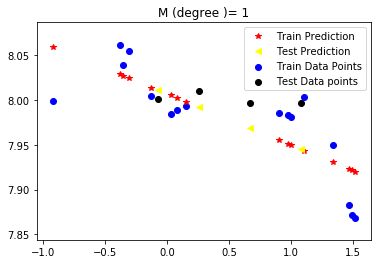

Root mean square error on training data =  0.03540975988139577
R2 Score of train data= 0.6133080220651153
Root mean square error on test data =  0.031095511560511303
R2 Score of test data= -30.118540162842773
-------------------------------------------------------------------------------------------


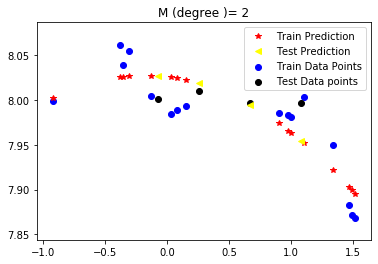

Root mean square error on training data =  0.02806137703223641
R2 Score of train data= 0.7571505316634151
Root mean square error on test data =  0.02516344328505147
R2 Score of test data= -19.378111769572065
-------------------------------------------------------------------------------------------


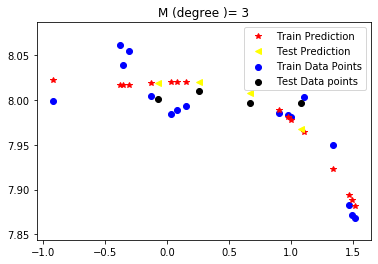

Root mean square error on training data =  0.02572726167678826
R2 Score of train data= 0.7958702391764974
Root mean square error on test data =  0.018774811259468793
R2 Score of test data= -10.34422842798908
-------------------------------------------------------------------------------------------


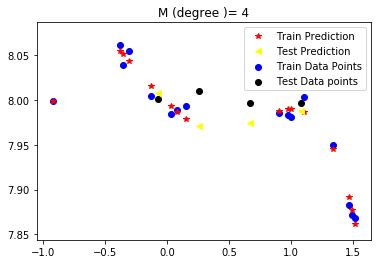

Root mean square error on training data =  0.009018034226528844
R2 Score of train data= 0.9749191091829862
Root mean square error on test data =  0.02295648313131799
R2 Score of test data= -15.960338490900611
-------------------------------------------------------------------------------------------


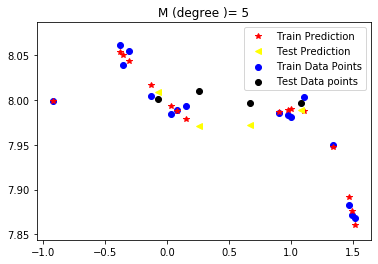

Root mean square error on training data =  0.008993836661173083
R2 Score of train data= 0.9750535247894286
Root mean square error on test data =  0.023712381983649475
R2 Score of test data= -17.095649186210558
-------------------------------------------------------------------------------------------


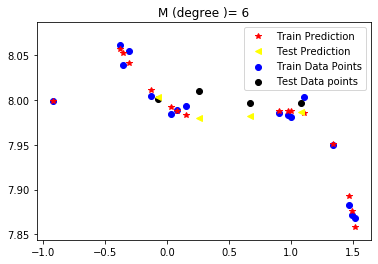

Root mean square error on training data =  0.00864859029008982
R2 Score of train data= 0.9769320051086378
Root mean square error on test data =  0.01762776518240202
R2 Score of test data= -9.000421766060594
-------------------------------------------------------------------------------------------


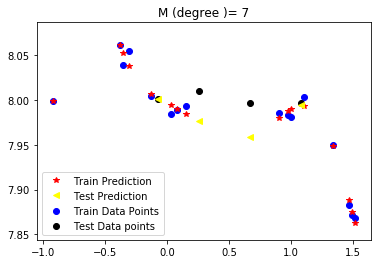

Root mean square error on training data =  0.007692045227127888
R2 Score of train data= 0.9817525216405213
Root mean square error on test data =  0.02538468422336709
R2 Score of test data= -19.738022145630016
-------------------------------------------------------------------------------------------


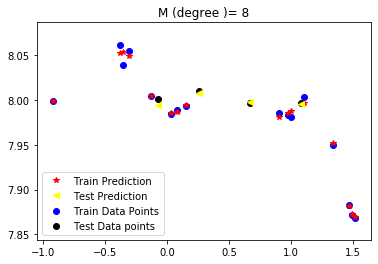

Root mean square error on training data =  0.005369786403731595
R2 Score of train data= 0.9911073086100656
Root mean square error on test data =  0.0033938088222019644
R2 Score of test data= 0.6293205142278104
-------------------------------------------------------------------------------------------


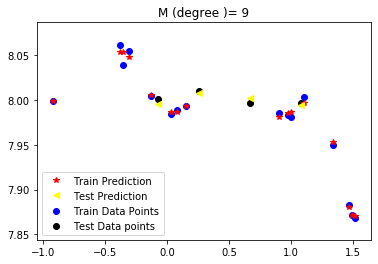

Root mean square error on training data =  0.00534287361127747
R2 Score of train data= 0.9911962236613499
Root mean square error on test data =  0.004346318343683582
R2 Score of test data= 0.3920513912739183
-------------------------------------------------------------------------------------------


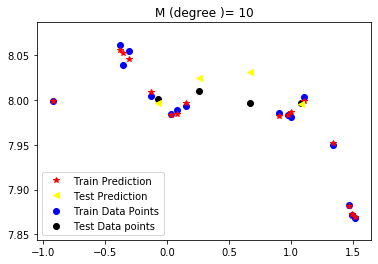

Root mean square error on training data =  0.005040713515192196
R2 Score of train data= 0.9921638411748193
Root mean square error on test data =  0.01897226792838936
R2 Score of test data= -10.584100099657457
-------------------------------------------------------------------------------------------


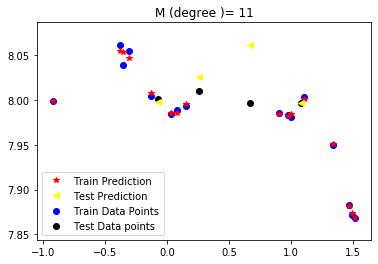

Root mean square error on training data =  0.004884483318852516
R2 Score of train data= 0.9926420562977089
Root mean square error on test data =  0.03327224893620721
R2 Score of test data= -34.62772706647318
-------------------------------------------------------------------------------------------


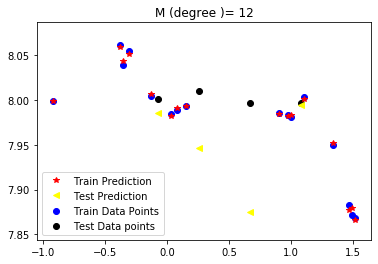

Root mean square error on training data =  0.003053274311792903
R2 Score of train data= 0.9971249139543565
Root mean square error on test data =  0.06886845289819084
R2 Score of test data= -151.63862916052864
-------------------------------------------------------------------------------------------


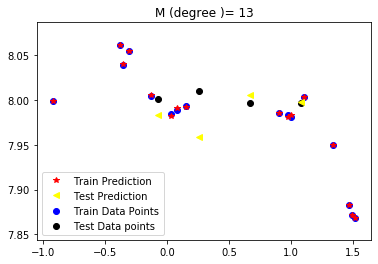

Root mean square error on training data =  0.0011278699254029796
R2 Score of train data= 0.9996076829057992
Root mean square error on test data =  0.027502844762240172
R2 Score of test data= -23.343276853034446
-------------------------------------------------------------------------------------------


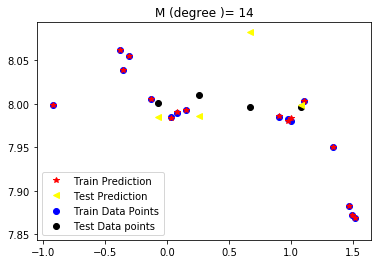

Root mean square error on training data =  0.001006464384622914
R2 Score of train data= 0.9996875964059199
Root mean square error on test data =  0.04536084787025372
R2 Score of test data= -65.2195355863991
-------------------------------------------------------------------------------------------


In [5]:
for i in range(1,15):
  poly_features = PolynomialFeatures(degree=i,include_bias=False)
  X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,Y_train)
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)
  list_rmse_train.append( rmse_train)
  list_rmse_test.append(rmse_test)
  list_r2_train.append(r2_train)
  list_r2_test.append(r2_test)
  plt.scatter(X_train,Y_train,color='blue',label='Train Data Points')
  plt.scatter(X_test,Y_test,color='black',label ='Test Data points')

  plt.plot(X_train,y_train_predict,'*',color='r',label='Train Prediction')
  plt.plot(X_test,y_test_predict,'<',color='yellow',label='Test Prediction')
  plt.legend()
  plt.title('M (degree )= {}'.format(i))
  plt.show()
  print("Root mean square error on training data = ",rmse_train)
  print('R2 Score of train data=',r2_train)
  print("Root mean square error on test data = ",rmse_test)
  print('R2 Score of test data=',r2_test)
  print('-------------------------------------------------------------------------------------------')


  

# Observation

The optimal value of M is 8 because it ahs highest test accuracy on both test and training data set. and minimum test and train error(Mean Square Error)

Yes I can distinguish between under fitting , over fitting and Good fitting. The above score of R2 on train and test dataset explain it all.
Where the value of R2_score on test data set is less that 0.5(50%) are considered as underfit (for M<8).

For M>8 the the score on train dataset is near to 1 but R2 score on test data starts to decrease . This implies that the the model start for overfit for M>8 

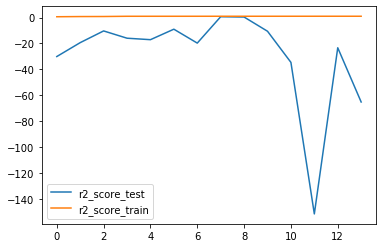

In [6]:
plt.plot(list_r2_test,label='r2_score_test')
plt.plot(list_r2_train,label='r2_score_train')


plt.legend()
plt.show()

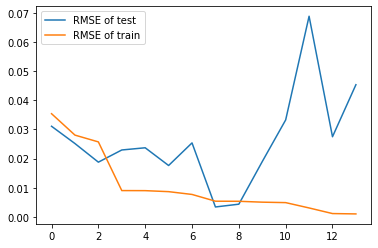

In [7]:
plt.plot(list_rmse_test,label ='RMSE of test')
plt.plot(list_rmse_train,label ='RMSE of train')
plt.legend()
plt.show()

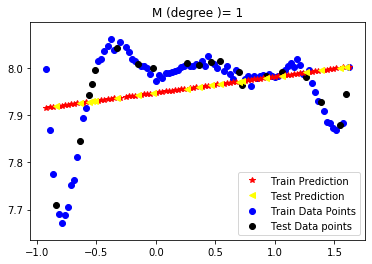

Root mean square error on training data =  0.08451904782471278
R2 Score of train data= 0.08113836168347544
Root mean square error on test data =  0.07312184860955115
R2 Score of test data= 0.01682295033106096
-------------------------------------------------------------------------------------------


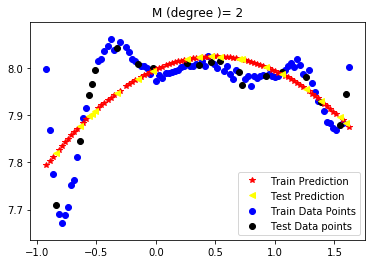

Root mean square error on training data =  0.0626546733113994
R2 Score of train data= 0.49505059039178534
Root mean square error on test data =  0.04793012745194132
R2 Score of test data= 0.577570173147518
-------------------------------------------------------------------------------------------


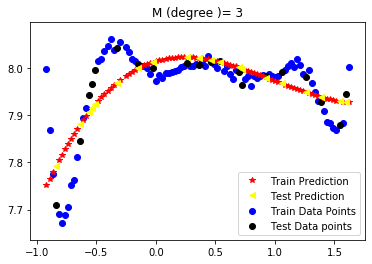

Root mean square error on training data =  0.059758893997265486
R2 Score of train data= 0.5406475562507882
Root mean square error on test data =  0.03805655362340933
R2 Score of test data= 0.73368457584377
-------------------------------------------------------------------------------------------


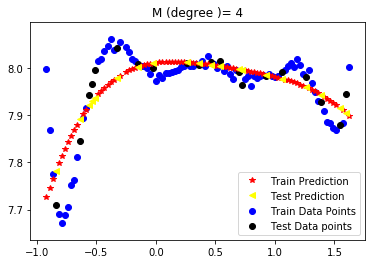

Root mean square error on training data =  0.058936172228628486
R2 Score of train data= 0.553208624771736
Root mean square error on test data =  0.03285796837850495
R2 Score of test data= 0.8014733463646292
-------------------------------------------------------------------------------------------


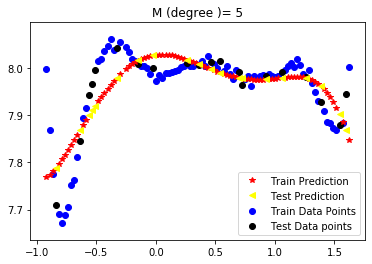

Root mean square error on training data =  0.0568344827199707
R2 Score of train data= 0.584506004239278
Root mean square error on test data =  0.03943784593708717
R2 Score of test data= 0.7140014839385749
-------------------------------------------------------------------------------------------


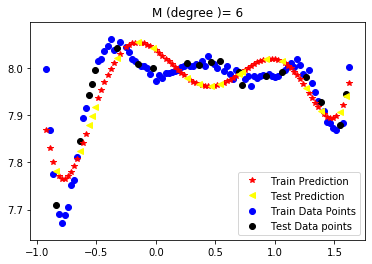

Root mean square error on training data =  0.04221169357066369
R2 Score of train data= 0.7708042909585594
Root mean square error on test data =  0.042629012973748534
R2 Score of test data= 0.6658450015684345
-------------------------------------------------------------------------------------------


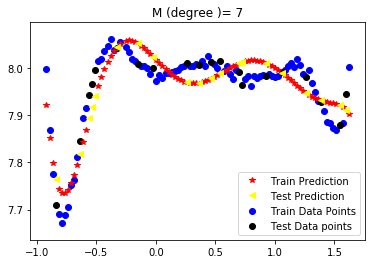

Root mean square error on training data =  0.03626715110055214
R2 Score of train data= 0.8308126794591137
Root mean square error on test data =  0.03623759768144161
R2 Score of test data= 0.7585338789386145
-------------------------------------------------------------------------------------------


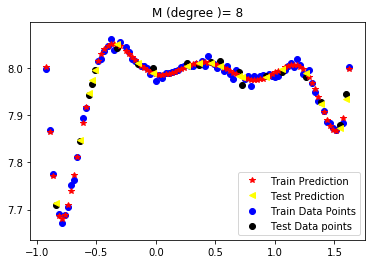

Root mean square error on training data =  0.006921752458527998
R2 Score of train data= 0.9938372712012224
Root mean square error on test data =  0.0075235838054661846
R2 Score of test data= 0.9895915290737495
-------------------------------------------------------------------------------------------


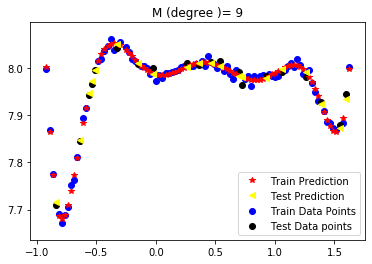

Root mean square error on training data =  0.006909586757233074
R2 Score of train data= 0.9938589154397124
Root mean square error on test data =  0.007560162033148917
R2 Score of test data= 0.9894900750509017
-------------------------------------------------------------------------------------------


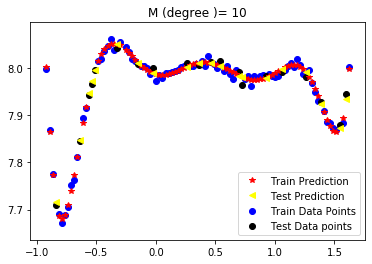

Root mean square error on training data =  0.006908241389744662
R2 Score of train data= 0.9938613066713307
Root mean square error on test data =  0.007566216304540671
R2 Score of test data= 0.9894732353547441
-------------------------------------------------------------------------------------------


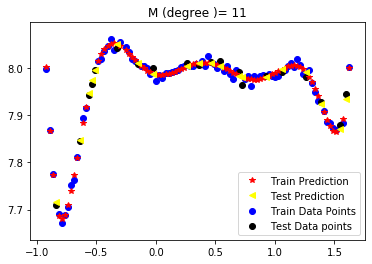

Root mean square error on training data =  0.006884269695760973
R2 Score of train data= 0.993903835458299
Root mean square error on test data =  0.007772171238057256
R2 Score of test data= 0.988892351489311
-------------------------------------------------------------------------------------------


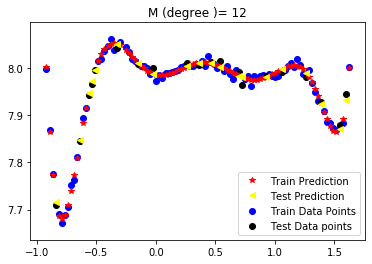

Root mean square error on training data =  0.006876220037652438
R2 Score of train data= 0.9939180834041103
Root mean square error on test data =  0.0078009401964656356
R2 Score of test data= 0.9888099686155956
-------------------------------------------------------------------------------------------


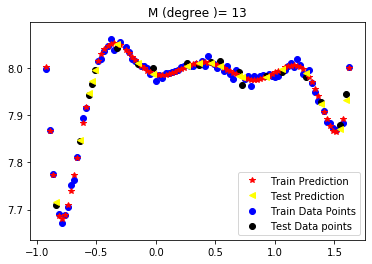

Root mean square error on training data =  0.006873879436539891
R2 Score of train data= 0.9939222231546954
Root mean square error on test data =  0.00784446123232916
R2 Score of test data= 0.9886847631343292
-------------------------------------------------------------------------------------------


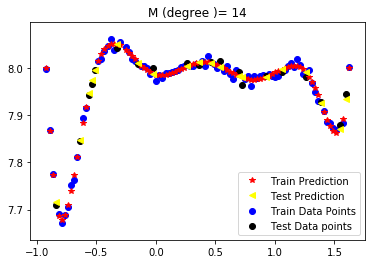

Root mean square error on training data =  0.006847790269413477
R2 Score of train data= 0.9939682708718992
Root mean square error on test data =  0.0077440152519555605
R2 Score of test data= 0.9889726843329452
-------------------------------------------------------------------------------------------


In [8]:
sample_data = data.iloc[:,:20]
X= sample_data.iloc[:,:1]
Y = sample_data.iloc[:,1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.20,)
list_rmse_train=[]
list_rmse_test=[]
list_r2_train=[]
list_r2_test=[]


for i in range(1,15):
  poly_features = PolynomialFeatures(degree=i,include_bias=True)
  X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,Y_train)
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)
  list_rmse_train.append( rmse_train)
  list_rmse_test.append(rmse_test)
  list_r2_train.append(r2_train)
  list_r2_test.append(r2_test)
  plt.scatter(X_train,Y_train,color='blue',label='Train Data Points')
  plt.scatter(X_test,Y_test,color='black',label ='Test Data points')

  plt.plot(X_train,y_train_predict,'*',color='r',label='Train Prediction')
  plt.plot(X_test,y_test_predict,'<',color='yellow',label='Test Prediction')
  plt.legend()
  plt.title('M (degree )= {}'.format(i))
  plt.show()
  print("Root mean square error on training data = ",rmse_train)
  print('R2 Score of train data=',r2_train)
  print("Root mean square error on test data = ",rmse_test)
  print('R2 Score of test data=',r2_test)
  print('-------------------------------------------------------------------------------------------')

0.577570173147518
--------------------------------------------------------------------------------------------
1 : -99.59490249191138
2 : -98.3272406831591
3 : -97.12707244501135
4 : -95.989554448252
5 : -94.91027529079219
6 : -93.88520980276908
7 : -92.91067891401042
8 : -91.98331432148333
0.5773152289693044
---------------------------------------------------------------------------------------------
1 : -60.73328594476045
2 : -60.73328594476045
3 : -60.73328594476045
4 : -60.73328594476045
5 : -60.73328594476045
6 : -60.73328594476045
7 : -60.73328594476045
8 : -60.73328594476045
-0.00022313684535801848
Linear Regreesion : 0.577570173147518
Ridge Regreesion : 0.5773152289693044
Lasso Regression : -0.00022313684535801848


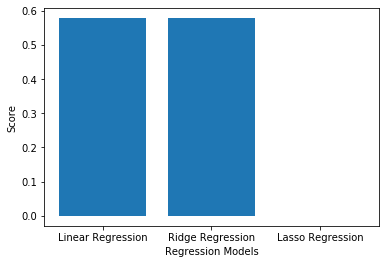

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

poly_features = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
# Bulding and fitting the Linear Regression model 
linearModel = LinearRegression() 
linearModel.fit(X_train_poly, Y_train) 
  
# Evaluating the Linear Regression model 
print(linearModel.score((poly_features.fit_transform(X_test)), Y_test)) 

print('--------------------------------------------------------------------------------------------')
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i  ) 
    ridgeModel.fit(X_train_poly, Y_train) 
    scores = cross_val_score(ridgeModel, X,Y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i ) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train_poly, Y_train) 
  
# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score((poly_features.fit_transform(X_test)), Y_test)) 

print('---------------------------------------------------------------------------------------------')
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X_train_poly, Y_train) 
    scores = cross_val_score(lassoModel, X, Y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925) 
lassoModelChosen.fit(X_train_poly, Y_train) 
  
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score((poly_features.fit_transform(X_test)), Y_test)) 
# Building the two lists for visualization 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [linearModel.score((poly_features.fit_transform(X_test)), Y_test), 
         ridgeModelChosen.score((poly_features.fit_transform(X_test)), Y_test), 
         lassoModelChosen.score((poly_features.fit_transform(X_test)), Y_test)] 
  
# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score((poly_features.fit_transform(X_test)), Y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score((poly_features.fit_transform(X_test)), Y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score((poly_features.fit_transform(X_test)), Y_test) 
  
# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

# Plotting the scores 
plt.bar(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show() 

# Using  all 100 datapoints points

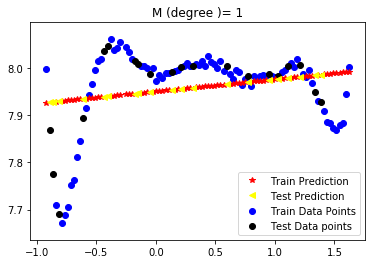

Root mean square error on training data =  0.08284068476330511
R2 Score of train data= 0.048987210062191866
Root mean square error on test data =  0.08067762716682077
R2 Score of test data= 0.1481619752322776
-------------------------------------------------------------------------------------------


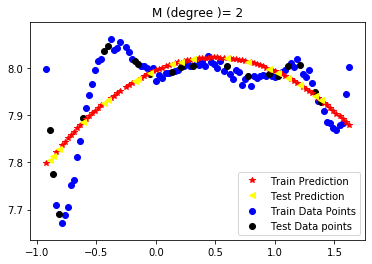

Root mean square error on training data =  0.06147420109986742
R2 Score of train data= 0.47629733440898214
Root mean square error on test data =  0.05370173586339103
R2 Score of test data= 0.622577803705322
-------------------------------------------------------------------------------------------


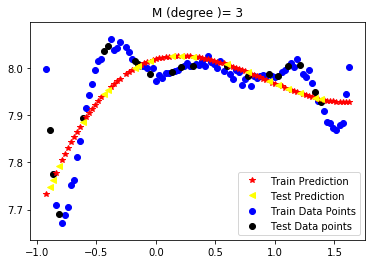

Root mean square error on training data =  0.05736712176133674
R2 Score of train data= 0.5439367064983418
Root mean square error on test data =  0.05092078375833575
R2 Score of test data= 0.6606553954771222
-------------------------------------------------------------------------------------------


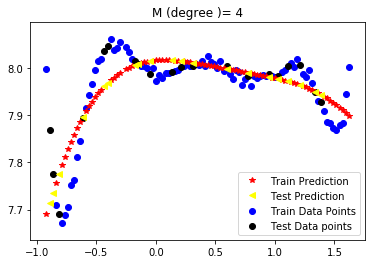

Root mean square error on training data =  0.056009076743487464
R2 Score of train data= 0.5652737899160196
Root mean square error on test data =  0.04989903890849472
R2 Score of test data= 0.6741369252703875
-------------------------------------------------------------------------------------------


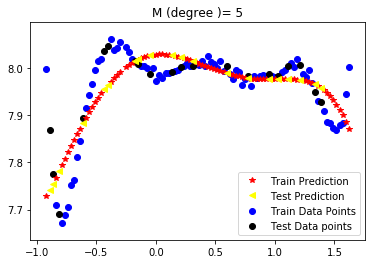

Root mean square error on training data =  0.0549743558732216
R2 Score of train data= 0.5811878267650266
Root mean square error on test data =  0.04758785213754174
R2 Score of test data= 0.7036240246032577
-------------------------------------------------------------------------------------------


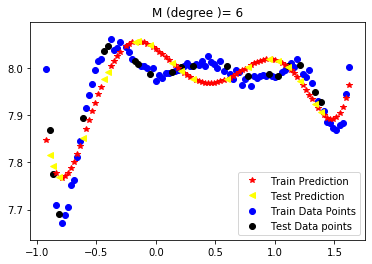

Root mean square error on training data =  0.04225193601806788
R2 Score of train data= 0.7526042558400529
Root mean square error on test data =  0.040242572631222336
R2 Score of test data= 0.7880554456465841
-------------------------------------------------------------------------------------------


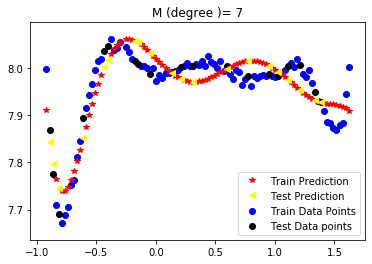

Root mean square error on training data =  0.03688545340067179
R2 Score of train data= 0.8114575049726616
Root mean square error on test data =  0.03270878082731869
R2 Score of test data= 0.8599834079965617
-------------------------------------------------------------------------------------------


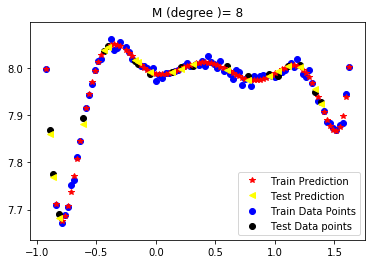

Root mean square error on training data =  0.007274902966999032
R2 Score of train data= 0.9926657888748395
Root mean square error on test data =  0.006043584918282111
R2 Score of test data= 0.9952198662689682
-------------------------------------------------------------------------------------------


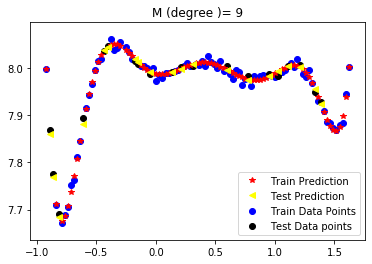

Root mean square error on training data =  0.007272342190039011
R2 Score of train data= 0.9926709512731381
Root mean square error on test data =  0.006021417135590701
R2 Score of test data= 0.9952548688802425
-------------------------------------------------------------------------------------------


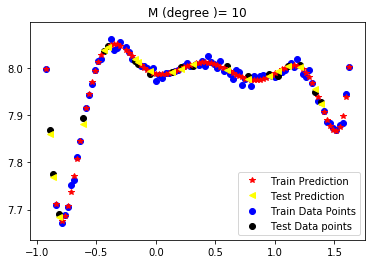

Root mean square error on training data =  0.007271805784489852
R2 Score of train data= 0.9926720324096735
Root mean square error on test data =  0.006027716768718523
R2 Score of test data= 0.9952449349323358
-------------------------------------------------------------------------------------------


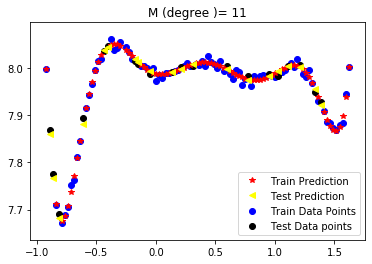

Root mean square error on training data =  0.00726498631394306
R2 Score of train data= 0.992685770242739
Root mean square error on test data =  0.006208164200528712
R2 Score of test data= 0.9949559755913164
-------------------------------------------------------------------------------------------


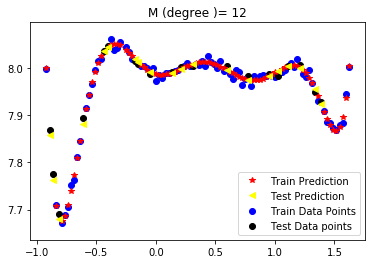

Root mean square error on training data =  0.007192527396954732
R2 Score of train data= 0.9928309427738241
Root mean square error on test data =  0.00706260445485241
R2 Score of test data= 0.9934719938132432
-------------------------------------------------------------------------------------------


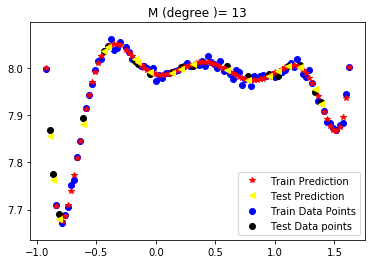

Root mean square error on training data =  0.0071884502369280075
R2 Score of train data= 0.9928390681816103
Root mean square error on test data =  0.007210090156353281
R2 Score of test data= 0.9931965032792062
-------------------------------------------------------------------------------------------


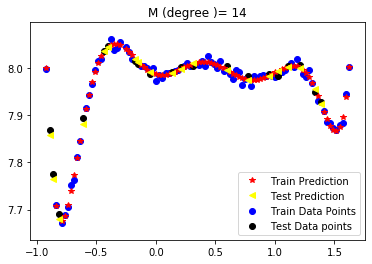

Root mean square error on training data =  0.007179219165981783
R2 Score of train data= 0.9928574478390461
Root mean square error on test data =  0.006926504722216016
R2 Score of test data= 0.9937211651722803
-------------------------------------------------------------------------------------------


In [10]:
sample_data = data
X= sample_data.iloc[:,:1]
Y = sample_data.iloc[:,1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.20,)
list_rmse_train=[]
list_rmse_test=[]
list_r2_train=[]
list_r2_test=[]


for i in range(1,15):
  poly_features = PolynomialFeatures(degree=i,include_bias=False)
  X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,Y_train)
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)
  list_rmse_train.append( rmse_train)
  list_rmse_test.append(rmse_test)
  list_r2_train.append(r2_train)
  list_r2_test.append(r2_test)
  plt.scatter(X_train,Y_train,color='blue',label='Train Data Points')
  plt.scatter(X_test,Y_test,color='black',label ='Test Data points')

  plt.plot(X_train,y_train_predict,'*',color='r',label='Train Prediction')
  plt.plot(X_test,y_test_predict,'<',color='yellow',label='Test Prediction')
  plt.legend()
  plt.title('M (degree )= {}'.format(i))
  plt.show()
  print("Root mean square error on training data = ",rmse_train)
  print('R2 Score of train data=',r2_train)
  print("Root mean square error on test data = ",rmse_test)
  print('R2 Score of test data=',r2_test)
  print('-------------------------------------------------------------------------------------------')

## Diffrence between using 20 and 100 data points
The optimal fit is at M == 8. The difference between using 20 and 100 data points is that the R2 score is increased and Root mean error is decresed . that means the model predict more correctly.

## Underlying Polynomial


In [11]:
poly_features = PolynomialFeatures(degree=8,include_bias=True)
X_train_poly  = poly_features.fit_transform(X_train.to_numpy())

p1 = np.poly1d(X_train_poly[2]) 
print(p1)

   8         7         6         5         4         3         2
1 x + 1.492 x + 2.226 x + 3.321 x + 4.954 x + 7.391 x + 11.03 x + 16.45 x + 24.54


# Part 1B

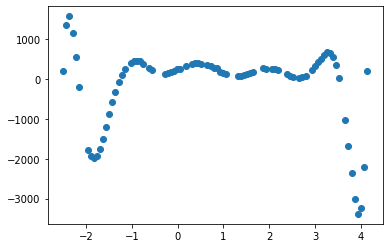

In [12]:
data = pd.read_csv('NonGaussian_noise.csv')
X = data.iloc[:,:1]
Y = data.iloc[:,1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,shuffle=True)
plt.scatter(X_train,Y_train)

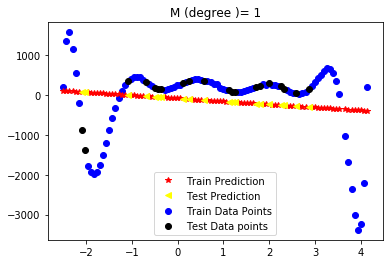

Root mean square error on training data =  979.4352653524094
R2 Score of train data= 0.02370946938202212
Root mean square error on test data =  529.9399862977073
R2 Score of test data= -0.5798628009119908
-------------------------------------------------------------------------------------------


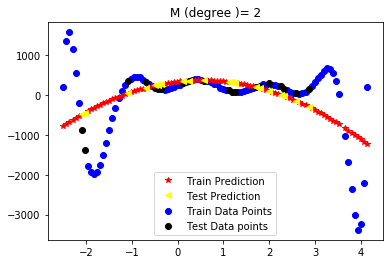

Root mean square error on training data =  882.5642335347324
R2 Score of train data= 0.20727920743035078
Root mean square error on test data =  291.196581571527
R2 Score of test data= 0.5229778584255668
-------------------------------------------------------------------------------------------


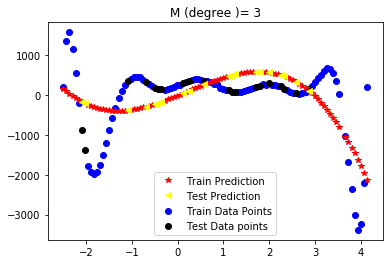

Root mean square error on training data =  788.909228605198
R2 Score of train data= 0.36659472528375703
Root mean square error on test data =  471.2834846141803
R2 Score of test data= -0.24948323917652337
-------------------------------------------------------------------------------------------


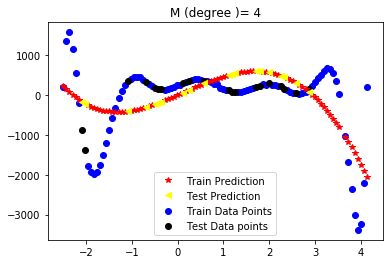

Root mean square error on training data =  788.5481714950315
R2 Score of train data= 0.3671743690163045
Root mean square error on test data =  475.2715290676812
R2 Score of test data= -0.27071919649827025
-------------------------------------------------------------------------------------------


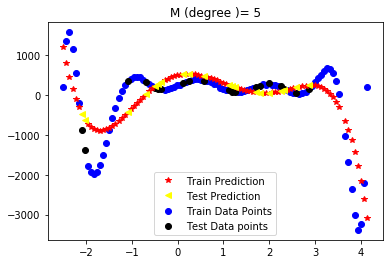

Root mean square error on training data =  673.7186197616504
R2 Score of train data= 0.5380609219083362
Root mean square error on test data =  297.1341720794225
R2 Score of test data= 0.5033262642695673
-------------------------------------------------------------------------------------------


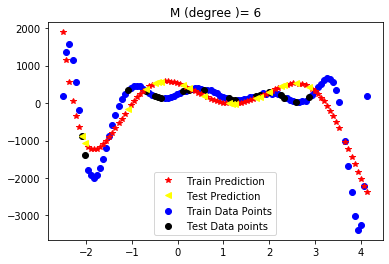

Root mean square error on training data =  615.0548041778064
R2 Score of train data= 0.6150048725883921
Root mean square error on test data =  265.2796097852963
R2 Score of test data= 0.6041107280368656
-------------------------------------------------------------------------------------------


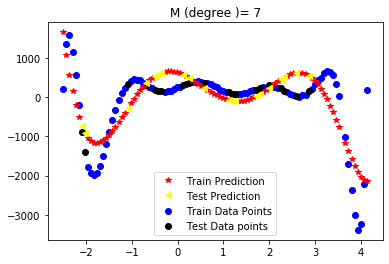

Root mean square error on training data =  608.4064444447463
R2 Score of train data= 0.6232830042886756
Root mean square error on test data =  325.5929232484018
R2 Score of test data= 0.40362983725296986
-------------------------------------------------------------------------------------------


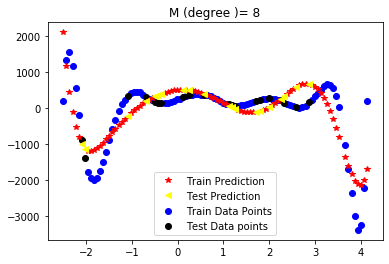

Root mean square error on training data =  583.9798285994326
R2 Score of train data= 0.6529250295372558
Root mean square error on test data =  273.4634915022465
R2 Score of test data= 0.5793075655220534
-------------------------------------------------------------------------------------------


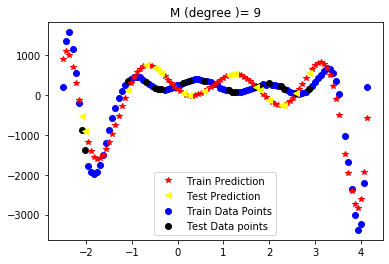

Root mean square error on training data =  349.9295949174192
R2 Score of train data= 0.8753796545383603
Root mean square error on test data =  370.0504359464778
R2 Score of test data= 0.22965044963530135
-------------------------------------------------------------------------------------------


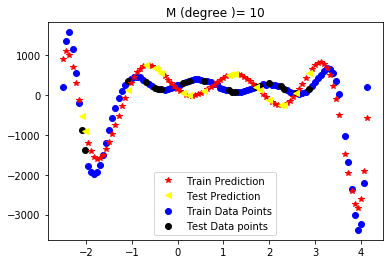

Root mean square error on training data =  349.9275117278544
R2 Score of train data= 0.8753811383055767
Root mean square error on test data =  370.0306823473933
R2 Score of test data= 0.22973269123559126
-------------------------------------------------------------------------------------------


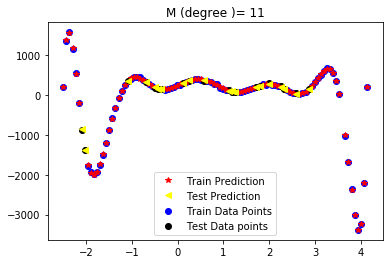

Root mean square error on training data =  12.326015703333214
R2 Score of train data= 0.9998453773770563
Root mean square error on test data =  13.789951610579795
R2 Score of test data= 0.9989302273818712
-------------------------------------------------------------------------------------------


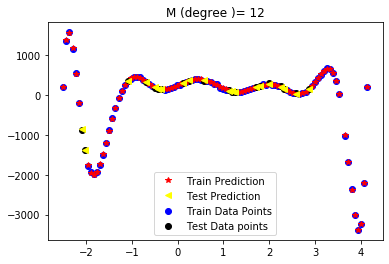

Root mean square error on training data =  12.231728632019403
R2 Score of train data= 0.9998477338812808
Root mean square error on test data =  14.053744504497907
R2 Score of test data= 0.9988889077950026
-------------------------------------------------------------------------------------------


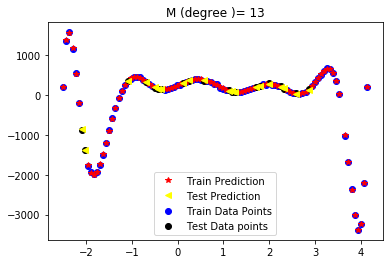

Root mean square error on training data =  12.091641924823989
R2 Score of train data= 0.9998512016353184
Root mean square error on test data =  14.543700451270537
R2 Score of test data= 0.9988100852852321
-------------------------------------------------------------------------------------------


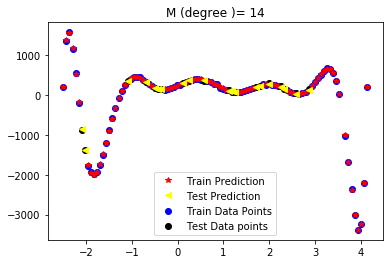

Root mean square error on training data =  12.067239303612713
R2 Score of train data= 0.9998518016210192
Root mean square error on test data =  14.743365037992238
R2 Score of test data= 0.9987771893002304
-------------------------------------------------------------------------------------------


In [13]:

list_rmse_train=[]
list_rmse_test=[]
list_r2_train=[]
list_r2_test=[]


for i in range(1,15):
  poly_features = PolynomialFeatures(degree=i,include_bias=False)
  X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,Y_train)
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)
  list_rmse_train.append( rmse_train)
  list_rmse_test.append(rmse_test)
  list_r2_train.append(r2_train)
  list_r2_test.append(r2_test)
  plt.scatter(X_train,Y_train,color='blue',label='Train Data Points')
  plt.scatter(X_test,Y_test,color='black',label ='Test Data points')

  plt.plot(X_train,y_train_predict,'*',color='r',label='Train Prediction')
  plt.plot(X_test,y_test_predict,'<',color='yellow',label='Test Prediction')
  plt.legend()
  plt.title('M (degree )= {}'.format(i))
  plt.show()
  print("Root mean square error on training data = ",rmse_train)
  print('R2 Score of train data=',r2_train)
  print("Root mean square error on test data = ",rmse_test)
  print('R2 Score of test data=',r2_test)
  print('-------------------------------------------------------------------------------------------')

# Question 2


E:\Python\PythonInstall\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
E:\Python\PythonInstall\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


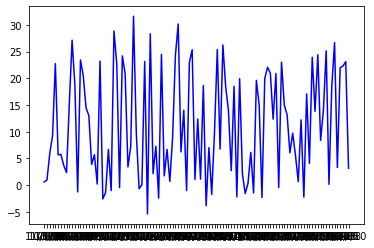

In [14]:
# reading Testing and Training Data
train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv')

# Ploting the training data set
plt.plot(train_data.id, train_data.value,color='blue')

# converting Human readable Date string to UNIX timestamp
import time
import datetime
index = 0
for i in train_data.id:
  train_data.id[index] = time.mktime(datetime.datetime.strptime(i, "%m/%d/%y").
                                     timetuple())
  train_data.id[index] =  int(train_data.id[index])
  index+=1

X_train,X_test,Y_train,Y_test = train_test_split(train_data.id,train_data.value,test_size= 0.2,shuffle=True)


In [15]:
""" 
Args:
    This funtion takes 5 agrument.
    x : list of data points
    a,b,c,d : parameters

return:
    List containing sin value corresponding to the list x

"""
import math
def basis_func (x,a,b,c,d):
  output =[]
  for item in x:
    output.append(a*np.sin((item*b)+c)+d)
  return output
import datetime

In [16]:
# generating point between 2004 and 2015 in UNIX timeStamp

points= np.arange(1100715500,1415878400,100000)

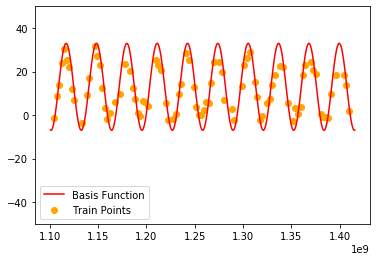

In [17]:
y = basis_func(points,20,0.0000002,180.3,13)
plt.plot(points,y,color='red',label='Basis Function')
plt.scatter(X_train,Y_train,color='orange',label ='Train Points')
plt.legend()
plt.ylim(-50,50)
plt.show()

## Observation

In this part instead of writing a loop to fit the function to the data points. I Chose the value of a,b,c,d manually.


*  'a'  determine the amplitude of the sine curse
*  'b' control the value which is actually fed to sine function
*  'c' is the initial Phase angle
*  'd' shifts the sin curse Up and Down (+ve move upwards)



## Tunning Parameter a

In [18]:
arr = np.arange(13,15,0.01)
y=[]
for num in arr:
  
  y_train_predict=basis_func(X_train,num,0.0000002,180.3,13)
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  y_test_predict = basis_func(X_test,num,0.0000002,180.3,13)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)

  print('a =',num)
  print("RMSE on train data =",rmse_train)
  print('R2 score on train =',r2_train)
  print("RMSE on test data =",rmse_test)
  print('R2 score on test =',r2_test) 
  print('------------------------------------------------------------------------------------------')


a = 13.0
RMSE on train data = 3.5468334053582877
R2 score on train = 0.8735560934766785
RMSE on test data = 2.9024336278371523
R2 score on test = 0.923457234248221
------------------------------------------------------------------------------------------
a = 13.01
RMSE on train data = 3.545957759903285
R2 score on train = 0.8736185189430461
RMSE on test data = 2.901030875355284
R2 score on test = 0.9235312029394508
------------------------------------------------------------------------------------------
a = 13.02
RMSE on train data = 3.545095443715423
R2 score on train = 0.8736799790918737
RMSE on test data = 2.899647825378847
R2 score on test = 0.9236040976877222
------------------------------------------------------------------------------------------
a = 13.03
RMSE on train data = 3.544246466523745
R2 score on train = 0.8737404739231611
RMSE on test data = 2.8982845061137192
R2 score on test = 0.9236759184930352
----------------------------------------------------------------------

a = 13.539999999999988
RMSE on train data = 3.5188178968744466
R2 score on train = 0.8755456992606339
RMSE on test data = 2.855460469826081
R2 score on test = 0.9259147312011721
------------------------------------------------------------------------------------------
a = 13.549999999999988
RMSE on train data = 3.518672306648226
R2 score on train = 0.8755559975798355
RMSE on test data = 2.855152577014112
R2 score on test = 0.9259307069726488
------------------------------------------------------------------------------------------
a = 13.559999999999988
RMSE on train data = 3.5185403581830723
R2 score on train = 0.8755653305814971
RMSE on test data = 2.8548653518189266
R2 score on test = 0.925945608801167
------------------------------------------------------------------------------------------
a = 13.569999999999988
RMSE on train data = 3.5184220530137735
R2 score on train = 0.8755736982656186
RMSE on test data = 2.8545988004791516
R2 score on test = 0.925959436686727
----------------

a = 13.849999999999982
RMSE on train data = 3.5206499236453204
R2 score on train = 0.8754160744997362
RMSE on test data = 2.855540147660556
R2 score on test = 0.9259105966412972
------------------------------------------------------------------------------------------
a = 13.859999999999982
RMSE on train data = 3.5209272282843243
R2 score on train = 0.8753964479751946
RMSE on test data = 2.8558738320757553
R2 score on test = 0.9258932801810638
------------------------------------------------------------------------------------------
a = 13.869999999999981
RMSE on train data = 3.521218148491335
R2 score on train = 0.8753758561331129
RMSE on test data = 2.8562281684528936
R2 score on test = 0.9258748897778719
------------------------------------------------------------------------------------------
a = 13.879999999999981
RMSE on train data = 3.521522680891921
R2 score on train = 0.8753542989734909
RMSE on test data = 2.8566031491068933
R2 score on test = 0.9258554254317217
--------------

a = 14.159999999999975
RMSE on train data = 3.535557549268756
R2 score on train = 0.8743587795827937
RMSE on test data = 2.875439207823948
R2 score on test = 0.9248744028984086
------------------------------------------------------------------------------------------
a = 14.169999999999975
RMSE on train data = 3.5362546709763873
R2 score on train = 0.8743092282145086
RMSE on test data = 2.8764075709585804
R2 score on test = 0.924823794206465
------------------------------------------------------------------------------------------
a = 14.179999999999975
RMSE on train data = 3.536965231974159
R2 score on train = 0.8742587115286835
RMSE on test data = 2.8773961469250975
R2 score on test = 0.924772111571563
------------------------------------------------------------------------------------------
a = 14.189999999999975
RMSE on train data = 3.5376892241640423
R2 score on train = 0.8742072295253183
RMSE on test data = 2.8784049148974655
R2 score on test = 0.9247193549937026
----------------

a = 14.519999999999968
RMSE on train data = 3.5690544295671214
R2 score on train = 0.8719667802742628
RMSE on test data = 2.9228632323897488
R2 score on test = 0.9223759059246538
------------------------------------------------------------------------------------------
a = 14.529999999999967
RMSE on train data = 3.5702292487637224
R2 score on train = 0.8718824774745337
RMSE on test data = 2.9245434509765733
R2 score on test = 0.9222866352862082
------------------------------------------------------------------------------------------
a = 14.539999999999967
RMSE on train data = 3.5714171272233006
R2 score on train = 0.8717972093572646
RMSE on test data = 2.92624290067298
R2 score on test = 0.9221962907048041
------------------------------------------------------------------------------------------
a = 14.549999999999967
RMSE on train data = 3.572618051919427
R2 score on train = 0.8717109759224554
RMSE on test data = 2.92796154799256
R2 score on test = 0.9221048721804418
----------------

a = 14.85999999999996
RMSE on train data = 3.6162409585494113
R2 score on train = 0.8685589419434756
RMSE on test data = 2.9905659309755683
R2 score on test = 0.9187382222178446
------------------------------------------------------------------------------------------
a = 14.86999999999996
RMSE on train data = 3.617851767381931
R2 score on train = 0.8684418183473829
RMSE on test data = 2.9928795770183463
R2 score on test = 0.9186124375188137
------------------------------------------------------------------------------------------
a = 14.87999999999996
RMSE on train data = 3.6194751265324965
R2 score on train = 0.86832372943375
RMSE on test data = 2.995211166721004
R2 score on test = 0.9184855788768244
------------------------------------------------------------------------------------------
a = 14.88999999999996
RMSE on train data = 3.621111019122028
R2 score on train = 0.8682046752025772
RMSE on test data = 2.997560658212242
R2 score on test = 0.9183576462918767
---------------------

 From the observation from the above we can say that optimal value of a is 14.4 because it has the highest R2 score on both test and trianing set and least RMSE on testing and training set

## Optimizing for b

In [19]:
arr = np.arange(0.00000001,0.000001,0.000000001)
y=[]
for num in arr:
  
  y_train_predict=basis_func(X_train,14.4,num,180.3,13)
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  y_test_predict = basis_func(X_test,14.4,num,180.3,13)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)

  print('b =',num)
  print("RMSE on train data =",rmse_train)
  print('R2 score on train =',r2_train)
  print("RMSE on test data =",rmse_test)
  print('R2 score on test =',r2_test) 
  print('------------------------------------------------------------------------------------------')

b = 1e-08
RMSE on train data = 13.020203526684632
R2 score on train = -0.7039304763439618
RMSE on test data = 13.214514918100965
R2 score on test = -0.5866531836528339
------------------------------------------------------------------------------------------
b = 1.1000000000000001e-08
RMSE on train data = 14.169073322098379
R2 score on train = -1.0178980474589663
RMSE on test data = 13.695934937633405
R2 score on test = -0.7043662465870908
------------------------------------------------------------------------------------------
b = 1.2000000000000002e-08
RMSE on train data = 15.545643668947452
R2 score on train = -1.4290348301883755
RMSE on test data = 15.54405739323053
R2 score on test = -1.1953731007843258
------------------------------------------------------------------------------------------
b = 1.3000000000000002e-08
RMSE on train data = 14.514782259716666
R2 score on train = -1.1175680477376968
RMSE on test data = 15.530127909345767
R2 score on test = -1.1914401878448126
-----

b = 4.200000000000002e-08
RMSE on train data = 13.329015370558082
R2 score on train = -0.7857162975257275
RMSE on test data = 17.82418452681163
R2 score on test = -1.8866816768452086
------------------------------------------------------------------------------------------
b = 4.300000000000003e-08
RMSE on train data = 14.661621027215572
R2 score on train = -1.160629513500043
RMSE on test data = 14.799206104687562
R2 score on test = -0.9900151990506978
------------------------------------------------------------------------------------------
b = 4.4000000000000023e-08
RMSE on train data = 14.746491576214176
R2 score on train = -1.1857160374648124
RMSE on test data = 12.264014558568052
R2 score on test = -0.36661087117902746
------------------------------------------------------------------------------------------
b = 4.500000000000002e-08
RMSE on train data = 14.926926805338724
R2 score on train = -1.2395312723462086
RMSE on test data = 13.418614250803772
R2 score on test = -0.63604367

b = 8.100000000000005e-08
RMSE on train data = 13.268403738295714
R2 score on train = -0.7695126868022675
RMSE on test data = 16.710406069612294
R2 score on test = -1.5371933442826964
------------------------------------------------------------------------------------------
b = 8.200000000000005e-08
RMSE on train data = 14.602546694955516
R2 score on train = -1.1432534528703617
RMSE on test data = 13.352884314337004
R2 score on test = -0.6200548892862516
------------------------------------------------------------------------------------------
b = 8.300000000000004e-08
RMSE on train data = 14.885759079171251
R2 score on train = -1.2271952738123493
RMSE on test data = 15.063786603499457
R2 score on test = -1.06180631685795
------------------------------------------------------------------------------------------
b = 8.400000000000005e-08
RMSE on train data = 14.664780647916
R2 score on train = -1.1615608573559792
RMSE on test data = 13.573041637873823
R2 score on test = -0.6739169965354

b = 1.1400000000000007e-07
RMSE on train data = 14.280313277391558
R2 score on train = -1.0497070490124871
RMSE on test data = 14.865694320578973
R2 score on test = -1.007936400873318
------------------------------------------------------------------------------------------
b = 1.1500000000000006e-07
RMSE on train data = 14.130851272094233
R2 score on train = -1.0070258938594265
RMSE on test data = 16.606513140942827
R2 score on test = -1.5057426395776838
------------------------------------------------------------------------------------------
b = 1.1600000000000007e-07
RMSE on train data = 14.670277248106752
R2 score on train = -1.1631815379167252
RMSE on test data = 15.075286384248315
R2 score on test = -1.0649555078962858
------------------------------------------------------------------------------------------
b = 1.1700000000000007e-07
RMSE on train data = 14.073203583583801
R2 score on train = -0.9906837219924347
RMSE on test data = 14.892052497147317
R2 score on test = -1.01506

b = 1.500000000000001e-07
RMSE on train data = 13.884350930406269
R2 score on train = -0.9376150040715348
RMSE on test data = 14.096850001547253
R2 score on test = -0.8056090116780246
------------------------------------------------------------------------------------------
b = 1.510000000000001e-07
RMSE on train data = 14.537887369033717
R2 score on train = -1.1243150428870612
RMSE on test data = 13.569908356531455
R2 score on test = -0.6731442519056825
------------------------------------------------------------------------------------------
b = 1.5200000000000012e-07
RMSE on train data = 14.98575376803505
R2 score on train = -1.2572180242494713
RMSE on test data = 14.332479659650923
R2 score on test = -0.8664752033051071
------------------------------------------------------------------------------------------
b = 1.530000000000001e-07
RMSE on train data = 14.42564167469912
R2 score on train = -1.0916383954313478
RMSE on test data = 15.444971698725029
R2 score on test = -1.167473468

b = 1.9400000000000012e-07
RMSE on train data = 12.62807146650085
R2 score on train = -0.6028407927518342
RMSE on test data = 14.257172309949203
R2 score on test = -0.8469126387221368
------------------------------------------------------------------------------------------
b = 1.9500000000000014e-07
RMSE on train data = 5.022374274500262
R2 score on train = 0.7464670134172358
RMSE on test data = 4.897992415133843
R2 score on test = 0.7820204393688692
------------------------------------------------------------------------------------------
b = 1.9600000000000014e-07
RMSE on train data = 11.935358842076493
R2 score on train = -0.43181624775824945
RMSE on test data = 9.928108877402153
R2 score on test = 0.10440302331510687
------------------------------------------------------------------------------------------
b = 1.9700000000000014e-07
RMSE on train data = 18.87010506170832
R2 score on train = -2.5790268875290403
RMSE on test data = 18.758108553487183
R2 score on test = -2.1971104936

b = 2.2800000000000016e-07
RMSE on train data = 13.04050605467214
R2 score on train = -0.7092485295627831
RMSE on test data = 11.48781633631224
R2 score on test = -0.19909757180786847
------------------------------------------------------------------------------------------
b = 2.2900000000000016e-07
RMSE on train data = 14.756996781982078
R2 score on train = -1.188831297159349
RMSE on test data = 14.378045570888034
R2 score on test = -0.8783618882988506
------------------------------------------------------------------------------------------
b = 2.3000000000000015e-07
RMSE on train data = 15.551373352332105
R2 score on train = -1.4308257068635566
RMSE on test data = 17.796162288498213
R2 score on test = -1.8776122357979954
------------------------------------------------------------------------------------------
b = 2.3100000000000015e-07
RMSE on train data = 14.694703913808523
R2 score on train = -1.1703911224787578
RMSE on test data = 16.775739976499864
R2 score on test = -1.557071

b = 2.590000000000002e-07
RMSE on train data = 14.35233770088401
R2 score on train = -1.07043506213216
RMSE on test data = 15.764822932638793
R2 score on test = -1.2581758095275895
------------------------------------------------------------------------------------------
b = 2.6000000000000016e-07
RMSE on train data = 14.080041139423859
R2 score on train = -0.9926185647059171
RMSE on test data = 15.285737346151523
R2 score on test = -1.123011477504288
------------------------------------------------------------------------------------------
b = 2.610000000000002e-07
RMSE on train data = 14.29315624445705
R2 score on train = -1.0533955055570083
RMSE on test data = 14.857345885412984
R2 score on test = -1.0056817574653558
------------------------------------------------------------------------------------------
b = 2.620000000000002e-07
RMSE on train data = 13.875806243289698
R2 score on train = -0.9352308494914963
RMSE on test data = 14.730144934046598
R2 score on test = -0.971485541432

b = 2.960000000000002e-07
RMSE on train data = 13.891949531558296
R2 score on train = -0.9397364129164167
RMSE on test data = 15.228281850647372
R2 score on test = -1.1070816693373309
------------------------------------------------------------------------------------------
b = 2.970000000000002e-07
RMSE on train data = 14.082143431824374
R2 score on train = -0.9932136452968368
RMSE on test data = 15.961805517234612
R2 score on test = -1.3149605062277279
------------------------------------------------------------------------------------------
b = 2.980000000000002e-07
RMSE on train data = 14.851407094939104
R2 score on train = -1.216927702397721
RMSE on test data = 14.231866233164457
R2 score on test = -0.8403620222854384
------------------------------------------------------------------------------------------
b = 2.9900000000000023e-07
RMSE on train data = 14.590384757419514
R2 score on train = -1.1396848616655788
RMSE on test data = 14.057965459258634
R2 score on test = -0.79566161

b = 3.510000000000002e-07
RMSE on train data = 14.937802717574542
R2 score on train = -1.2427959522425538
RMSE on test data = 13.553967059940423
R2 score on test = -0.669215496973111
------------------------------------------------------------------------------------------
b = 3.5200000000000024e-07
RMSE on train data = 14.116049516164802
R2 score on train = -1.0028234650215753
RMSE on test data = 15.611712606041904
R2 score on test = -1.214525329080271
------------------------------------------------------------------------------------------
b = 3.5300000000000026e-07
RMSE on train data = 13.53435171370709
R2 score on train = -0.8411587706718116
RMSE on test data = 15.799644899420652
R2 score on test = -1.2681627238684294
------------------------------------------------------------------------------------------
b = 3.5400000000000023e-07
RMSE on train data = 13.552119883910402
R2 score on train = -0.8459961647215077
RMSE on test data = 17.214116621737958
R2 score on test = -1.69245862

b = 3.8100000000000025e-07
RMSE on train data = 13.149389113274335
R2 score on train = -0.7379107872886681
RMSE on test data = 17.29610583001074
R2 score on test = -1.7181675547766968
------------------------------------------------------------------------------------------
b = 3.8200000000000027e-07
RMSE on train data = 13.945660005586756
R2 score on train = -0.9547646227029416
RMSE on test data = 15.310219423269306
R2 score on test = -1.1298174761224473
------------------------------------------------------------------------------------------
b = 3.8300000000000024e-07
RMSE on train data = 15.192613852368165
R2 score on train = -1.3199644174619967
RMSE on test data = 12.245918857081245
R2 score on test = -0.3625809448104145
------------------------------------------------------------------------------------------
b = 3.8400000000000026e-07
RMSE on train data = 15.297563218643283
R2 score on train = -1.3521273834702607
RMSE on test data = 12.568023007232796
R2 score on test = -0.43520

b = 4.2000000000000027e-07
RMSE on train data = 14.741179152850322
R2 score on train = -1.1841415127892958
RMSE on test data = 14.819923671662224
R2 score on test = -0.9955907861227955
------------------------------------------------------------------------------------------
b = 4.210000000000003e-07
RMSE on train data = 14.538386661258965
R2 score on train = -1.1244609612274123
RMSE on test data = 14.636157730829838
R2 score on test = -0.9464072726127402
------------------------------------------------------------------------------------------
b = 4.220000000000003e-07
RMSE on train data = 14.262228118677116
R2 score on train = -1.0445186748397748
RMSE on test data = 13.068868822910373
R2 score on test = -0.5518707730340779
------------------------------------------------------------------------------------------
b = 4.230000000000003e-07
RMSE on train data = 13.757350439851676
R2 score on train = -0.9023302988211059
RMSE on test data = 16.2125888442813
R2 score on test = -1.388274790

b = 4.680000000000003e-07
RMSE on train data = 13.950158285511536
R2 score on train = -0.9560258748192283
RMSE on test data = 16.037927758409484
R2 score on test = -1.337093363375765
------------------------------------------------------------------------------------------
b = 4.6900000000000035e-07
RMSE on train data = 14.554012272848263
R2 score on train = -1.1290300845889956
RMSE on test data = 16.611254896685416
R2 score on test = -1.5071738028525141
------------------------------------------------------------------------------------------
b = 4.700000000000003e-07
RMSE on train data = 14.753975642403946
R2 score on train = -1.1879351679458998
RMSE on test data = 13.771212153450923
R2 score on test = -0.723153212942109
------------------------------------------------------------------------------------------
b = 4.7100000000000034e-07
RMSE on train data = 14.533441651056345
R2 score on train = -1.1230160011044519
RMSE on test data = 12.609088190547391
R2 score on test = -0.44459770

b = 5.080000000000004e-07
RMSE on train data = 14.691482461336872
R2 score on train = -1.1694396170254242
RMSE on test data = 12.685292297386301
R2 score on test = -0.4621115704549976
------------------------------------------------------------------------------------------
b = 5.090000000000003e-07
RMSE on train data = 14.56030474637604
R2 score on train = -1.13087146843348
RMSE on test data = 13.16872636220094
R2 score on test = -0.5756766641767896
------------------------------------------------------------------------------------------
b = 5.100000000000003e-07
RMSE on train data = 14.032878037381524
R2 score on train = -0.9792918030432685
RMSE on test data = 17.153367649360405
R2 score on test = -1.6734886722990825
------------------------------------------------------------------------------------------
b = 5.110000000000004e-07
RMSE on train data = 13.788496334992422
R2 score on train = -0.9109535943333458
RMSE on test data = 17.21841228786945
R2 score on test = -1.6938025616881

b = 5.430000000000003e-07
RMSE on train data = 13.863817529484933
R2 score on train = -0.9318882104291655
RMSE on test data = 14.66933109655232
R2 score on test = -0.9552404725967765
------------------------------------------------------------------------------------------
b = 5.440000000000004e-07
RMSE on train data = 14.621060423255532
R2 score on train = -1.148691513324045
RMSE on test data = 13.077542350516367
R2 score on test = -0.5539313432018804
------------------------------------------------------------------------------------------
b = 5.450000000000004e-07
RMSE on train data = 14.313590415301922
R2 score on train = -1.059270964755611
RMSE on test data = 14.08859864877651
R2 score on test = -0.8034958649021493
------------------------------------------------------------------------------------------
b = 5.460000000000004e-07
RMSE on train data = 14.555634306925242
R2 score on train = -1.1295046687408523
RMSE on test data = 15.996245897382812
R2 score on test = -1.324961145997

b = 5.740000000000003e-07
RMSE on train data = 14.33707703628017
R2 score on train = -1.0660344665230759
RMSE on test data = 14.042019389683775
R2 score on test = -0.791590261633957
------------------------------------------------------------------------------------------
b = 5.750000000000004e-07
RMSE on train data = 13.495530254906528
R2 score on train = -0.8306116886136019
RMSE on test data = 18.560765219812893
R2 score on test = -2.130194405343587
------------------------------------------------------------------------------------------
b = 5.760000000000004e-07
RMSE on train data = 14.530188608730562
R2 score on train = -1.1220657116745607
RMSE on test data = 15.634443135845359
R2 score on test = -1.2209786863312
------------------------------------------------------------------------------------------
b = 5.770000000000004e-07
RMSE on train data = 14.738530260915224
R2 score on train = -1.1833566318831652
RMSE on test data = 13.737425292249954
R2 score on test = -0.71470827459044

b = 6.080000000000005e-07
RMSE on train data = 14.74362845115835
R2 score on train = -1.184867378540578
RMSE on test data = 15.36397981396941
R2 score on test = -1.1448010428658022
------------------------------------------------------------------------------------------
b = 6.090000000000004e-07
RMSE on train data = 14.509764495887785
R2 score on train = -1.1161042132063077
RMSE on test data = 15.500486729812364
R2 score on test = -1.1830828989298512
------------------------------------------------------------------------------------------
b = 6.100000000000004e-07
RMSE on train data = 13.868814076923766
R2 score on train = -0.9332809740757375
RMSE on test data = 15.072198936786338
R2 score on test = -1.0641097808396776
------------------------------------------------------------------------------------------
b = 6.110000000000004e-07
RMSE on train data = 14.147723026170858
R2 score on train = -1.0118213958031554
RMSE on test data = 14.141153466126505
R2 score on test = -0.81697615232

b = 6.540000000000004e-07
RMSE on train data = 13.870196653972819
R2 score on train = -0.9336664494480389
RMSE on test data = 17.068258752959647
R2 score on test = -1.6470246922027472
------------------------------------------------------------------------------------------
b = 6.550000000000004e-07
RMSE on train data = 14.077114774082064
R2 score on train = -0.9917903677021278
RMSE on test data = 15.07603213824461
R2 score on test = -1.0651598140530671
------------------------------------------------------------------------------------------
b = 6.560000000000005e-07
RMSE on train data = 14.792512401440487
R2 score on train = -1.1993796825932272
RMSE on test data = 13.941784737749712
R2 score on test = -0.7661041139555789
------------------------------------------------------------------------------------------
b = 6.570000000000004e-07
RMSE on train data = 14.79415882617924
R2 score on train = -1.1998692971412122
RMSE on test data = 13.165550001655317
R2 score on test = -0.5749166341

R2 score on test = -0.5385075958873389
------------------------------------------------------------------------------------------
b = 7.000000000000005e-07
RMSE on train data = 14.05357519138593
R2 score on train = -0.9851346411851851
RMSE on test data = 14.050581792481665
R2 score on test = -0.7937758439317855
------------------------------------------------------------------------------------------
b = 7.010000000000005e-07
RMSE on train data = 13.048059675764243
R2 score on train = -0.7112292433476286
RMSE on test data = 17.5722642367118
R2 score on test = -1.805659781832103
------------------------------------------------------------------------------------------
b = 7.020000000000004e-07
RMSE on train data = 14.797145800500846
R2 score on train = -1.2007577040488098
RMSE on test data = 14.12670708049515
R2 score on test = -0.8132656586060485
------------------------------------------------------------------------------------------
b = 7.030000000000005e-07
RMSE on train data = 15.

b = 7.320000000000005e-07
RMSE on train data = 14.402028235464844
R2 score on train = -1.0847963632776856
RMSE on test data = 15.177204059825183
R2 score on test = -1.0929704802993871
------------------------------------------------------------------------------------------
b = 7.330000000000005e-07
RMSE on train data = 14.978139120324307
R2 score on train = -1.2549247057398518
RMSE on test data = 12.480048225217788
R2 score on test = -0.41518130719009827
------------------------------------------------------------------------------------------
b = 7.340000000000005e-07
RMSE on train data = 14.692368154774323
R2 score on train = -1.1697011993886073
RMSE on test data = 13.606145764883022
R2 score on test = -0.6820921923550811
------------------------------------------------------------------------------------------
b = 7.350000000000005e-07
RMSE on train data = 14.171087354866485
R2 score on train = -1.0184717478753895
RMSE on test data = 15.249603774323194
R2 score on test = -1.1129862

b = 7.760000000000005e-07
RMSE on train data = 13.438641871667974
R2 score on train = -0.8152108791708275
RMSE on test data = 17.128154192946962
R2 score on test = -1.6656350134017157
------------------------------------------------------------------------------------------
b = 7.770000000000006e-07
RMSE on train data = 13.548277180361163
R2 score on train = -0.844949448727639
RMSE on test data = 17.1999638549246
R2 score on test = -1.6880331780990216
------------------------------------------------------------------------------------------
b = 7.780000000000005e-07
RMSE on train data = 14.987238206420706
R2 score on train = -1.2576652312550642
RMSE on test data = 11.341010937374284
R2 score on test = -0.16864631750967551
------------------------------------------------------------------------------------------
b = 7.790000000000005e-07
RMSE on train data = 15.464101306353992
R2 score on train = -1.4036193798268273
RMSE on test data = 10.29615280874898
R2 score on test = 0.036771075793

b = 8.110000000000006e-07
RMSE on train data = 14.898280092883036
R2 score on train = -1.230943617547739
RMSE on test data = 11.121347904171332
R2 score on test = -0.12381392731028518
------------------------------------------------------------------------------------------
b = 8.120000000000005e-07
RMSE on train data = 14.714896044263828
R2 score on train = -1.1763599301512233
RMSE on test data = 14.518038962026434
R2 score on test = -0.9151177060358751
------------------------------------------------------------------------------------------
b = 8.130000000000005e-07
RMSE on train data = 14.17502519779809
R2 score on train = -1.019593684231408
RMSE on test data = 17.3900925134112
R2 score on test = -1.747788750380106
------------------------------------------------------------------------------------------
b = 8.140000000000006e-07
RMSE on train data = 13.547947091940868
R2 score on train = -0.844859549617635
RMSE on test data = 16.78789177665728
R2 score on test = -1.560777693470169

b = 8.410000000000006e-07
RMSE on train data = 14.63173224714445
R2 score on train = -1.1518292920020756
RMSE on test data = 14.409285810492912
R2 score on test = -0.8865332666496928
------------------------------------------------------------------------------------------
b = 8.420000000000006e-07
RMSE on train data = 14.177214905130638
R2 score on train = -1.0202176916824643
RMSE on test data = 13.549930859652555
R2 score on test = -0.6682215023883618
------------------------------------------------------------------------------------------
b = 8.430000000000005e-07
RMSE on train data = 13.667068961411166
R2 score on train = -0.8774444516843887
RMSE on test data = 16.164775099836113
R2 score on test = -1.3742086868895926
------------------------------------------------------------------------------------------
b = 8.440000000000006e-07
RMSE on train data = 14.08624749830114
R2 score on train = -0.9943756095053664
RMSE on test data = 16.599361954272418
R2 score on test = -1.5035850312

b = 8.750000000000006e-07
RMSE on train data = 14.37365125993384
R2 score on train = -1.0765889175788907
RMSE on test data = 14.874708757672915
R2 score on test = -1.0103723320793652
------------------------------------------------------------------------------------------
b = 8.760000000000006e-07
RMSE on train data = 15.428077391823892
R2 score on train = -1.3924338704384316
RMSE on test data = 13.413452607784492
R2 score on test = -0.6347852653352124
------------------------------------------------------------------------------------------
b = 8.770000000000006e-07
RMSE on train data = 14.290671836070578
R2 score on train = -1.0526817332363971
RMSE on test data = 16.517171649102647
R2 score on test = -1.4788538408901912
------------------------------------------------------------------------------------------
b = 8.780000000000006e-07
RMSE on train data = 13.530107993246313
R2 score on train = -0.8400043543591846
RMSE on test data = 15.74907150453051
R2 score on test = -1.2536655496

b = 9.360000000000007e-07
RMSE on train data = 14.625712937958012
R2 score on train = -1.1500591855849018
RMSE on test data = 16.019688571631544
R2 score on test = -1.3317806516157953
------------------------------------------------------------------------------------------
b = 9.370000000000006e-07
RMSE on train data = 14.190688100607188
R2 score on train = -1.02405930960518
RMSE on test data = 15.829710866531014
R2 score on test = -1.2768033473418892
------------------------------------------------------------------------------------------
b = 9.380000000000007e-07
RMSE on train data = 13.71302814555727
R2 score on train = -0.8900925030139888
RMSE on test data = 15.165471158584369
R2 score on test = -1.0897357443137383
------------------------------------------------------------------------------------------
b = 9.390000000000007e-07
RMSE on train data = 14.25134400519592
R2 score on train = -1.0413993470507439
RMSE on test data = 13.276723442112427
R2 score on test = -0.601626972818

b = 9.740000000000005e-07
RMSE on train data = 13.81317022295419
R2 score on train = -0.9177988428242485
RMSE on test data = 16.347865751022024
R2 score on test = -1.4282963194144909
------------------------------------------------------------------------------------------
b = 9.750000000000006e-07
RMSE on train data = 14.623974154623241
R2 score on train = -1.1495479947977163
RMSE on test data = 15.116344118128746
R2 score on test = -1.0762186898375234
------------------------------------------------------------------------------------------
b = 9.760000000000005e-07
RMSE on train data = 14.957313538255544
R2 score on train = -1.2486585771505032
RMSE on test data = 14.074226811117358
R2 score on test = -0.7998182344840681
------------------------------------------------------------------------------------------
b = 9.770000000000006e-07
RMSE on train data = 14.467535900822456
R2 score on train = -1.103804899450834
RMSE on test data = 13.982291189853859
R2 score on test = -0.7763814976

From the above observation we can see that optimal value of b is 0.0000002

##Optimizing for C

In [20]:
arr = np.arange(349,351,0.01)
y=[]
for num in arr:
  
  y_train_predict=basis_func(X_train,14.4,0.0000002,num,13)
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  y_test_predict = basis_func(X_test,14.4,0.0000002,num,13)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)

  print('c =',num)
  print("RMSE on train data =",rmse_train)
  print('R2 score on train =',r2_train)
  print("RMSE on test data =",rmse_test)
  print('R2 score on test =',r2_test) 
  print('------------------------------------------------------------------------------------------')

c = 349.0
RMSE on train data = 10.468111510307406
R2 score on train = -0.10142011907771686
RMSE on test data = 10.13713063754204
R2 score on test = 0.06629508925289929
------------------------------------------------------------------------------------------
c = 349.01
RMSE on train data = 10.390174544563765
R2 score on train = -0.08508063130673293
RMSE on test data = 10.032537456668214
R2 score on test = 0.08546330455834228
------------------------------------------------------------------------------------------
c = 349.02
RMSE on train data = 10.312025110683047
R2 score on train = -0.06881920431256572
RMSE on test data = 9.928009701527502
R2 score on test = 0.10442091618291427
------------------------------------------------------------------------------------------
c = 349.03
RMSE on train data = 10.233666920242372
R2 score on train = -0.05263760299566678
RMSE on test data = 9.823557408173713
R2 score on test = 0.12316650535658125
---------------------------------------------------

c = 349.36999999999966
RMSE on train data = 7.480554085722277
R2 score on train = 0.43755007999005935
RMSE on test data = 6.397038828423804
R2 score on test = 0.6281759046921214
------------------------------------------------------------------------------------------
c = 349.37999999999965
RMSE on train data = 7.398355809633813
R2 score on train = 0.44984286108181515
RMSE on test data = 6.302660934910044
R2 score on test = 0.6390662911122703
------------------------------------------------------------------------------------------
c = 349.38999999999965
RMSE on train data = 7.316195019531177
R2 score on train = 0.461994306522559
RMSE on test data = 6.208837876989138
R2 score on test = 0.6497322149678941
------------------------------------------------------------------------------------------
c = 349.39999999999964
RMSE on train data = 7.234083904637061
R2 score on train = 0.4740028294718184
RMSE on test data = 6.115589541160426
R2 score on test = 0.6601743041413742
------------------

RMSE on train data = 4.5397948272010735
R2 score on train = 0.7928481691337281
RMSE on test data = 3.440893114183036
R2 score on test = 0.8924223827786942
------------------------------------------------------------------------------------------
c = 349.7599999999993
RMSE on train data = 4.474495212565458
R2 score on train = 0.798764581970168
RMSE on test data = 3.3906183667919403
R2 score on test = 0.8955430413540777
------------------------------------------------------------------------------------------
c = 349.7699999999993
RMSE on train data = 4.410392081220573
R2 score on train = 0.8044892128973022
RMSE on test data = 3.3424874574620898
R2 score on test = 0.898487592237058
------------------------------------------------------------------------------------------
c = 349.7799999999993
RMSE on train data = 4.347549578507958
R2 score on train = 0.8100210813634787
RMSE on test data = 3.2965654956763437
R2 score on test = 0.9012577603240959
-------------------------------------------

c = 350.079999999999
RMSE on train data = 3.4202738427405075
R2 score on train = 0.8824187472971167
RMSE on test data = 3.1116396843907177
R2 score on test = 0.9120252260420244
------------------------------------------------------------------------------------------
c = 350.089999999999
RMSE on train data = 3.4319296198377462
R2 score on train = 0.8816159834451479
RMSE on test data = 3.142660143128351
R2 score on test = 0.9102624121288655
------------------------------------------------------------------------------------------
c = 350.099999999999
RMSE on train data = 3.4465998735407033
R2 score on train = 0.8806017228503759
RMSE on test data = 3.175438175977811
R2 score on test = 0.9083807188988982
------------------------------------------------------------------------------------------
c = 350.109999999999
RMSE on train data = 3.464248510250816
R2 score on train = 0.8793758121006232
RMSE on test data = 3.209892887687202
R2 score on test = 0.906381724413405
------------------------

c = 350.5299999999986
RMSE on train data = 5.993090781462334
R2 score on train = 0.6389909931197699
RMSE on test data = 5.411665996258081
R2 score on test = 0.7339020521774904
------------------------------------------------------------------------------------------
c = 350.5399999999986
RMSE on train data = 6.076066492390368
R2 score on train = 0.6289252868387416
RMSE on test data = 5.471320330566019
R2 score on test = 0.7280031710620536
------------------------------------------------------------------------------------------
c = 350.5499999999986
RMSE on train data = 6.159458990567194
R2 score on train = 0.6186695720475244
RMSE on test data = 5.5310654802582935
R2 score on test = 0.7220304933615098
------------------------------------------------------------------------------------------
c = 350.5599999999986
RMSE on train data = 6.243242560341243
R2 score on train = 0.6082249800767314
RMSE on test data = 5.590895737540583
R2 score on test = 0.7159843031879685
----------------------

c = 350.8899999999983
RMSE on train data = 9.10625091957304
R2 score on train = 0.16651929449293112
RMSE on test data = 7.599789057619486
R2 score on test = 0.47521352658632565
------------------------------------------------------------------------------------------
c = 350.8999999999983
RMSE on train data = 9.193303776378283
R2 score on train = 0.1505075049082173
RMSE on test data = 7.661796683400485
R2 score on test = 0.46661499442142285
------------------------------------------------------------------------------------------
c = 350.90999999999826
RMSE on train data = 9.280256844815979
R2 score on train = 0.13436199197027332
RMSE on test data = 7.723893968615908
R2 score on test = 0.45793400620873315
------------------------------------------------------------------------------------------
c = 350.91999999999825
RMSE on train data = 9.36710247416378
R2 score on train = 0.11808471959283906
RMSE on test data = 7.7860837236460245
R2 score on test = 0.44916986077653387
---------------

Optimal valure of c is 349.9899999999991

In [21]:
arr = np.arange(12,12.3,0.01)
y=[]
for num in arr:
  
  y_train_predict=basis_func(X_train,14.4,0.0000002,349.9899999999991,num)
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  y_test_predict = basis_func(X_test,14.4,0.0000002,349.9899999999991,num)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)

  print('d =',num)
  print("RMSE on train data =",rmse_train)
  print('R2 score on train =',r2_train)
  print("RMSE on test data =",rmse_test)
  print('R2 score on test =',r2_test) 
  print('------------------------------------------------------------------------------------------')

d = 12.0
RMSE on train data = 3.1359676268935877
R2 score on train = 0.9011539165163349
RMSE on test data = 2.3847349542453045
R2 score on test = 0.9483274622518836
------------------------------------------------------------------------------------------
d = 12.01
RMSE on train data = 3.1377180838409124
R2 score on train = 0.901043536484053
RMSE on test data = 2.388668347658107
R2 score on test = 0.9481568638055412
------------------------------------------------------------------------------------------
d = 12.02
RMSE on train data = 3.1394994171682806
R2 score on train = 0.9009311462191306
RMSE on test data = 2.3926370698892185
R2 score on test = 0.9479844481306458
------------------------------------------------------------------------------------------
d = 12.03
RMSE on train data = 3.141311574348789
R2 score on train = 0.9008167457215679
RMSE on test data = 2.3966409454301707
R2 score on test = 0.9478102152271972
-------------------------------------------------------------------

 Optimal value of d=12.189999999999996





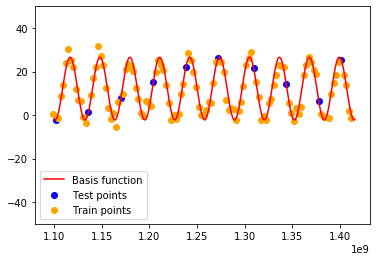

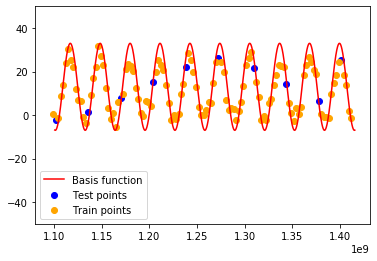

In [28]:
y = basis_func(points,14.4,0.0000002, 349.9899999999991,12.1899)
plt.plot(points,y,color='red',label = 'Basis function')
plt.scatter(predict_data.id,predict_value(predict_data.id),label='Test points',color='blue')
plt.scatter(train_data.id,train_data.value,color='orange',label='Train points')
plt.legend()
plt.ylim(-50,50)
plt.show()

y = basis_func(points,20,0.0000002,180.3,13)
plt.plot(points,y,color='red',label = 'Basis function')
plt.scatter(predict_data.id,predict_value(predict_data.id),label='Test points',color='blue')
plt.scatter(train_data.id,train_data.value,color='orange',label='Train points')
plt.legend()
plt.ylim(-50,50)
plt.show()

In [ ]:
y_train_predict=y[3]
rmse_train = np.sqrt(mean_squared_error(train_data.value,y_train_predict))
r2_train = r2_score(train_data.value,y_train_predict)
print(rmse_train)
print(r2_train)

In [ ]:
train_data.

In [83]:
# reading test.csv
predict_data = pd.read_csv('test.csv')
predict_data.head()

#converting date in UNIX timestamp
import time
import datetime
index = 0
for i in predict_data.id:
  predict_data.id[index] = time.mktime(datetime.datetime.strptime(i, "%m/%d/%y").timetuple())
  predict_data.id[index] =  int(predict_data.id[index])
  index+=1




In [84]:
def predict_value (x):
  output =[]
  for item in x:
    output.append(14.4*np.sin((item*0.0000002)+349.9899999999991)+12.1899)
  return output

input_value=predict_value(predict_data.id)

In [85]:
predict_data=pd.read_csv('test.csv')
predict_data.head()

,id
0,5/1/10
1,4/1/09
2,9/1/13
3,1/1/06
4,2/1/07


In [86]:
input_value

[26.19025547174526,
 22.44162238469449,
 6.4787039632852785,
 1.3497434357022549,
 8.03641395441242,
 14.368470203722293,
 25.379894679397907,
 15.508394298394574,
 -2.0288852087450575,
 21.78044891787476]

In [87]:
import csv 
fields = ['id','value'] 
filename = 'result.csv'
f = open (filename,"w",newline="") 
writer = csv.writer(f) 
writer.writerow(fields) 
for i in range(0,10): 
    tup=(predict_data.id[i],input_value[i])
    writer.writerow(tup)
f.close()

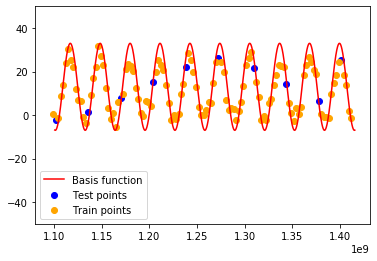

In [27]:
y = basis_func(points,20,0.0000002,180.3,13)
plt.plot(points,y,color='red',label = 'Basis function')
plt.scatter(predict_data.id,predict_value(predict_data.id),label='Test points',color='blue')
plt.scatter(train_data.id,train_data.value,color='orange',label='Train points')
plt.legend()
plt.ylim(-50,50)
plt.show()